> This is a self-correcting activity generated by [nbgrader](https://nbgrader.readthedocs.io). Fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. Run subsequent cells to check your code.

---

# Classify common images

In this activity, you'll train models to associate images representing common objects with their class.

The [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. The classes are completely mutually exclusive. There are 50,000 training images and 10,000 test images.

![CIFAR10 images](images/cifar10.png)

## Package setup

In [1]:
# Import base packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Setup plots
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [3]:
# Import ML packages (edit this list if needed)
import tensorflow as tf
print(f'TensorFlow version: {tf.__version__}')
print(f'Keras version: {tf.keras.__version__}')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

TensorFlow version: 2.1.0
Keras version: 2.2.4-tf


## Utility functions

In [4]:
def plot_loss_acc(history):
    """Plot training and (optionally) validation loss and accuracy"""

    loss = history.history['loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 10))

    plt.subplot(2, 1, 1)
    plt.plot(epochs, loss, '.--', label='Training loss')
    final_loss = loss[-1]
    title = 'Training loss: {:.4f}'.format(final_loss)
    plt.ylabel('Loss')
    if 'val_loss' in history.history:
        val_loss = history.history['val_loss']
        plt.plot(epochs, val_loss, 'o-', label='Validation loss')
        final_val_loss = val_loss[-1]
        title += ', Validation loss: {:.4f}'.format(final_val_loss)
    plt.title(title)
    plt.legend()

    acc = history.history['accuracy']

    plt.subplot(2, 1, 2)
    plt.plot(epochs, acc, '.--', label='Training acc')
    final_acc = acc[-1]
    title = 'Training accuracy: {:.2f}%'.format(final_acc * 100)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    if 'val_accuracy' in history.history:
        val_acc = history.history['val_accuracy']
        plt.plot(epochs, val_acc, 'o-', label='Validation acc')
        final_val_acc = val_acc[-1]
        title += ', Validation accuracy: {:.2f}%'.format(final_val_acc * 100)
    plt.title(title)
    plt.legend()

## Step 1: Loading the data

### Question

* Load the CIFAR10 dataset included with Keras.
* Display the first 30 test images.

In [5]:
# Load the data

# YOUR CODE HERE
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [6]:
print(f'Training images: {train_images.shape}. Training labels: {train_labels.shape}')
print(f'Training labels: {train_labels}')

Training images: (50000, 32, 32, 3). Training labels: (50000, 1)
Training labels: [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


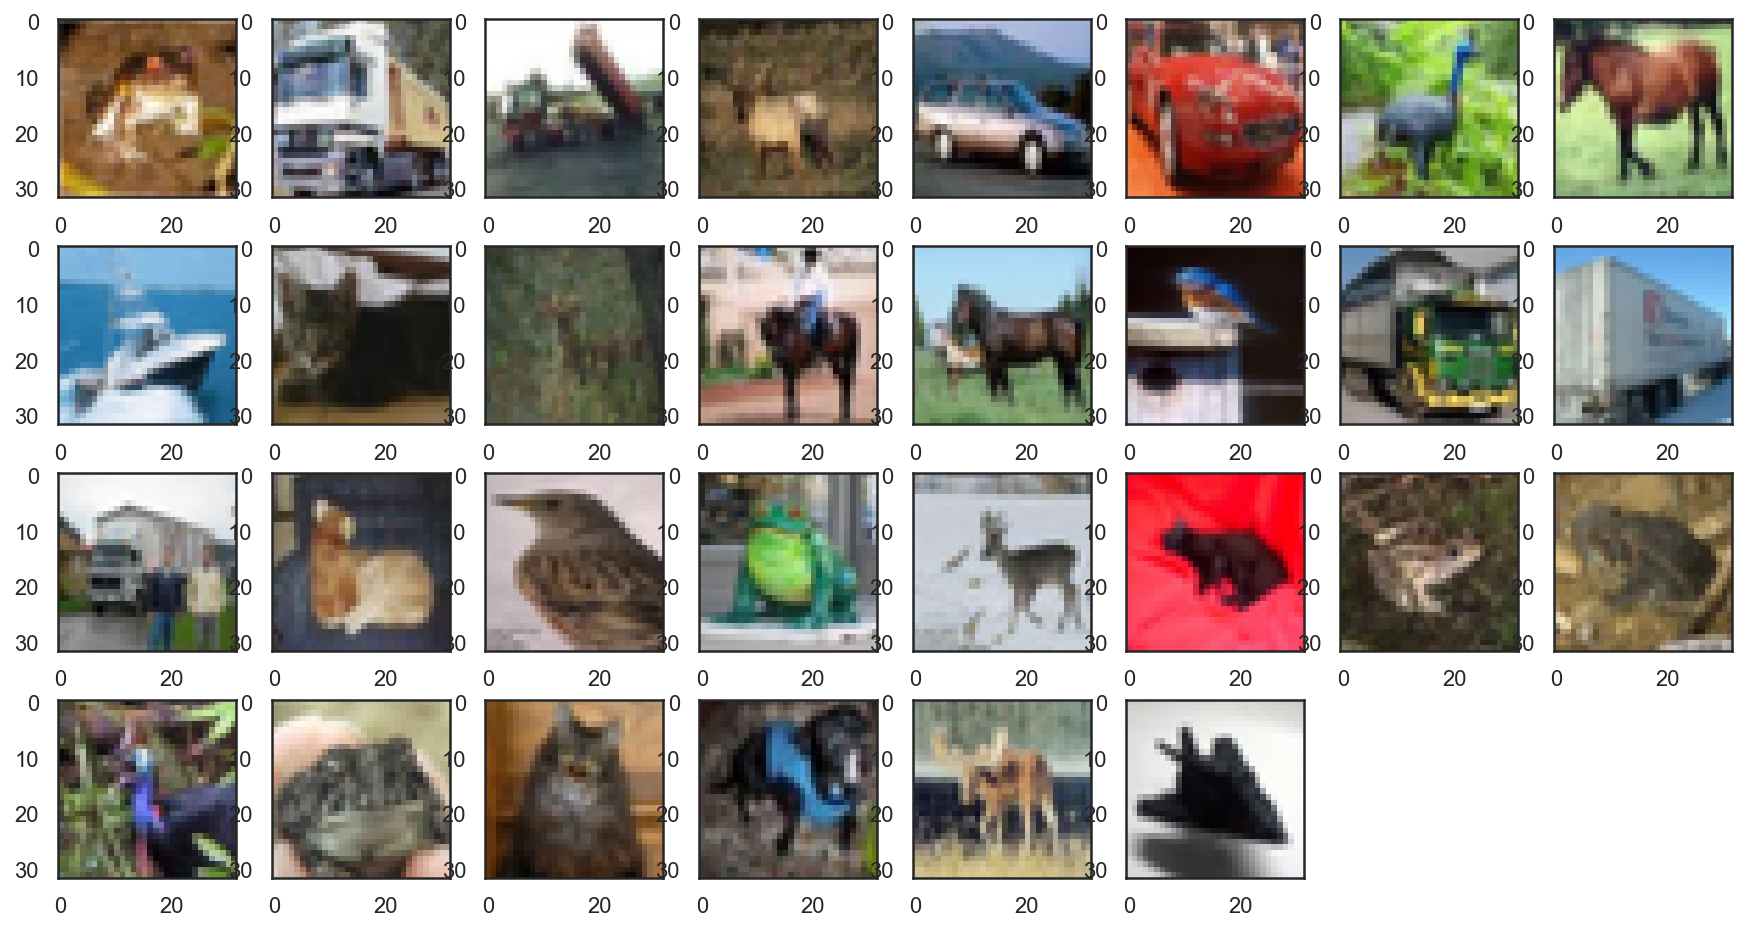

In [7]:
# Plot the first 30 images

# YOUR CODE HERE
with sns.axes_style("white"):  # Temporary hide Seaborn grid lines
    plt.figure(figsize=(15, 8))
    for i in range(30):
        digit = train_images[i]
        fig = plt.subplot(4, 8, i + 1)
        plt.imshow(digit, cmap=plt.cm.binary)

## Step 2: Training a dense neural network

### Question

* Prepare data for training with a dense network.
* Train a model on the data to obtain the expected validation accuracy. Use 20% of the training set for validation. Store the training history in a variable named `history`.

In [8]:
# Prepare data for training

# YOUR CODE HERE
'''
train_img = train_images.astype("float32") / 255.
test_img = test_images.astype("float32") / 255.

# One-hot encoding of expected results
train_lab = to_categorical(train_labels)
test_lab = to_categorical(test_labels)

# Show a sample of encoded targets
#df_y_train = pd.DataFrame(y_train)
#df_y_train.sample(n=10)

x_train, x_val = np.split(train_img, [int(0.8 * len(train_img))])
y_train, y_val = np.split(train_lab, [int(0.8 * len(train_lab))])

#flattened_size = x_train.shape[1]*x_train.shape[2]*x_train.shape[3]
#x_train = x_train.reshape((x_train.shape[0], flattened_size))
#x_val = x_val.reshape((x_val.shape[0], flattened_size))

print(f'x_train: {x_train.shape}. x_val: {x_val.shape}')
print(f'y_train: {y_train.shape}. y_val: {y_val.shape}')'''

'\ntrain_img = train_images.astype("float32") / 255.\ntest_img = test_images.astype("float32") / 255.\n\n# One-hot encoding of expected results\ntrain_lab = to_categorical(train_labels)\ntest_lab = to_categorical(test_labels)\n\n# Show a sample of encoded targets\n#df_y_train = pd.DataFrame(y_train)\n#df_y_train.sample(n=10)\n\nx_train, x_val = np.split(train_img, [int(0.8 * len(train_img))])\ny_train, y_val = np.split(train_lab, [int(0.8 * len(train_lab))])\n\n#flattened_size = x_train.shape[1]*x_train.shape[2]*x_train.shape[3]\n#x_train = x_train.reshape((x_train.shape[0], flattened_size))\n#x_val = x_val.reshape((x_val.shape[0], flattened_size))\n\nprint(f\'x_train: {x_train.shape}. x_val: {x_val.shape}\')\nprint(f\'y_train: {y_train.shape}. y_val: {y_val.shape}\')'

In [9]:
x_train = train_images.astype("float32") / 255.
x_test = test_images.astype("float32") / 255.

# One-hot encoding of expected results
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [10]:
# Create and train a model

# YOUR CODE HERE
# Create a linear stack of layers
model = Sequential()

# Convolution module 1: Conv2D+MaxPooling2D
#   filters: number of convolution filters
#   kernel_size: size of the convolution kernel (2D convolution window)
#   input_shape: shapre of the input feature map
#   (Here, The expected input shape is a 3D tensor corresponding to an image)
model.add(
    Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3))
)
#   pool_size: factors by which to downscale (vertical, horizontal)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution module 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the last output feature map (a 3D tensor) to feed the Dense layer
model.add(Flatten())
model.add(Dense(128))
# To fight overfitting
model.add(Dropout(0.5))
# Classification layer
model.add(Dense(10, activation="softmax"))

In [11]:
# Describe the model
model.summary()

# conv2d_2 : nb_params = 32 (kernels) * 3*3*3 (kernel shape) + 32 (biais) = 896
# conv2d_3 : nb_params = 64 (kernels) * 3*3*32 (kernel shape) + 64 (biais) = 18496
# dense_4  : nb_params = 2304 (= 6*6*64 input features) * 128 (neurons) + 128 (biais) = 295040
# dense_5  : nb_params = 128 (input neurons) * 10 (neurons) + 10

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               295040    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [12]:
# Train the model and show results

model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

history = model.fit(x_train, y_train, verbose=1, epochs=10, batch_size=128, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 20s 509us/sample - loss: 1.5917 - accuracy: 0.4236 - val_loss: 1.3383 - val_accuracy: 0.5356
Epoch 2/10
40000/40000 [==============================] - 19s 473us/sample - loss: 1.2508 - accuracy: 0.5588 - val_loss: 1.1313 - val_accuracy: 0.6117
Epoch 3/10
40000/40000 [==============================] - 19s 480us/sample - loss: 1.1182 - accuracy: 0.6106 - val_loss: 1.0292 - val_accuracy: 0.6434
Epoch 4/10
40000/40000 [==============================] - 18s 454us/sample - loss: 1.0342 - accuracy: 0.6424 - val_loss: 0.9850 - val_accuracy: 0.6601
Epoch 5/10
40000/40000 [==============================] - 19s 467us/sample - loss: 0.9725 - accuracy: 0.6637 - val_loss: 0.9606 - val_accuracy: 0.6745
Epoch 6/10
40000/40000 [==============================] - 19s 474us/sample - loss: 0.9240 - accuracy: 0.6805 - val_loss: 0.9337 - val_accuracy: 0.6771
Epoch 7/10
40000/40000 [====================

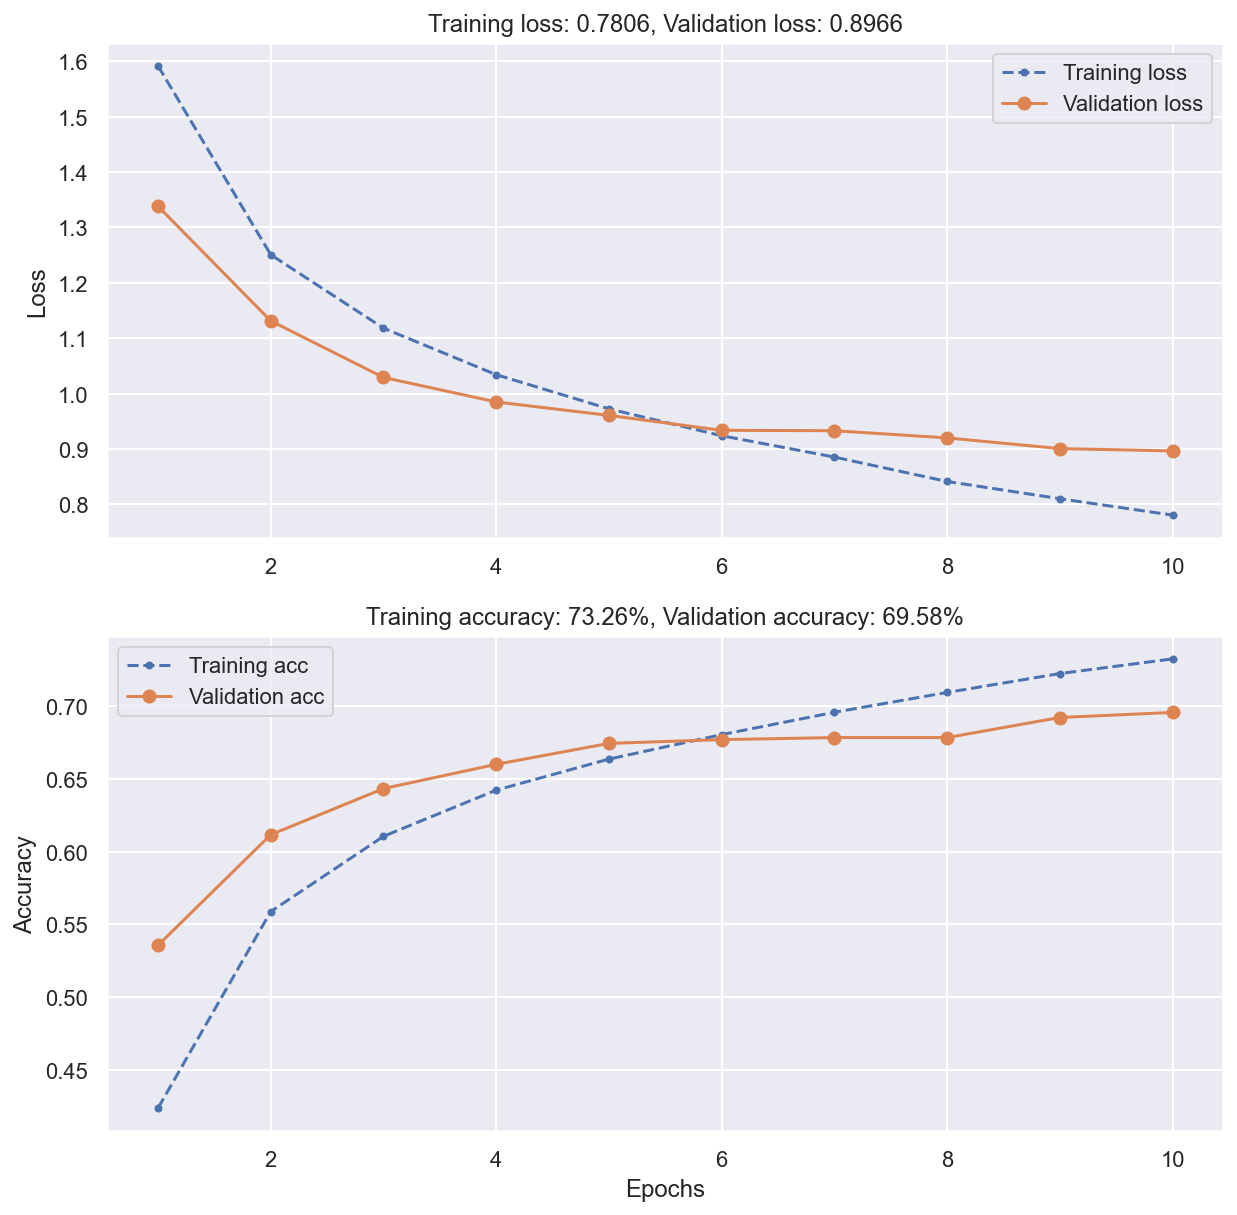

In [13]:
# Plot training history
plot_loss_acc(history)

In [14]:
# Retrieve final validation accuracy
val_acc = history.history['val_accuracy'][-1]

# Assert final accuracy
assert val_acc > 0.45

In [15]:
# Evaluate model performance on test data
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f'Test accuracy: {test_acc * 100:.2f}%')

Test accuracy: 69.65%


## Step 3: Training a convnet

### Question

Train a model on the data to obtain the expected validation accuracy. Store the training history in a variable named `history`.

In [16]:
# Create a convnet

# YOUR CODE HERE

In [17]:
# Train the convnet

# YOUR CODE HERE

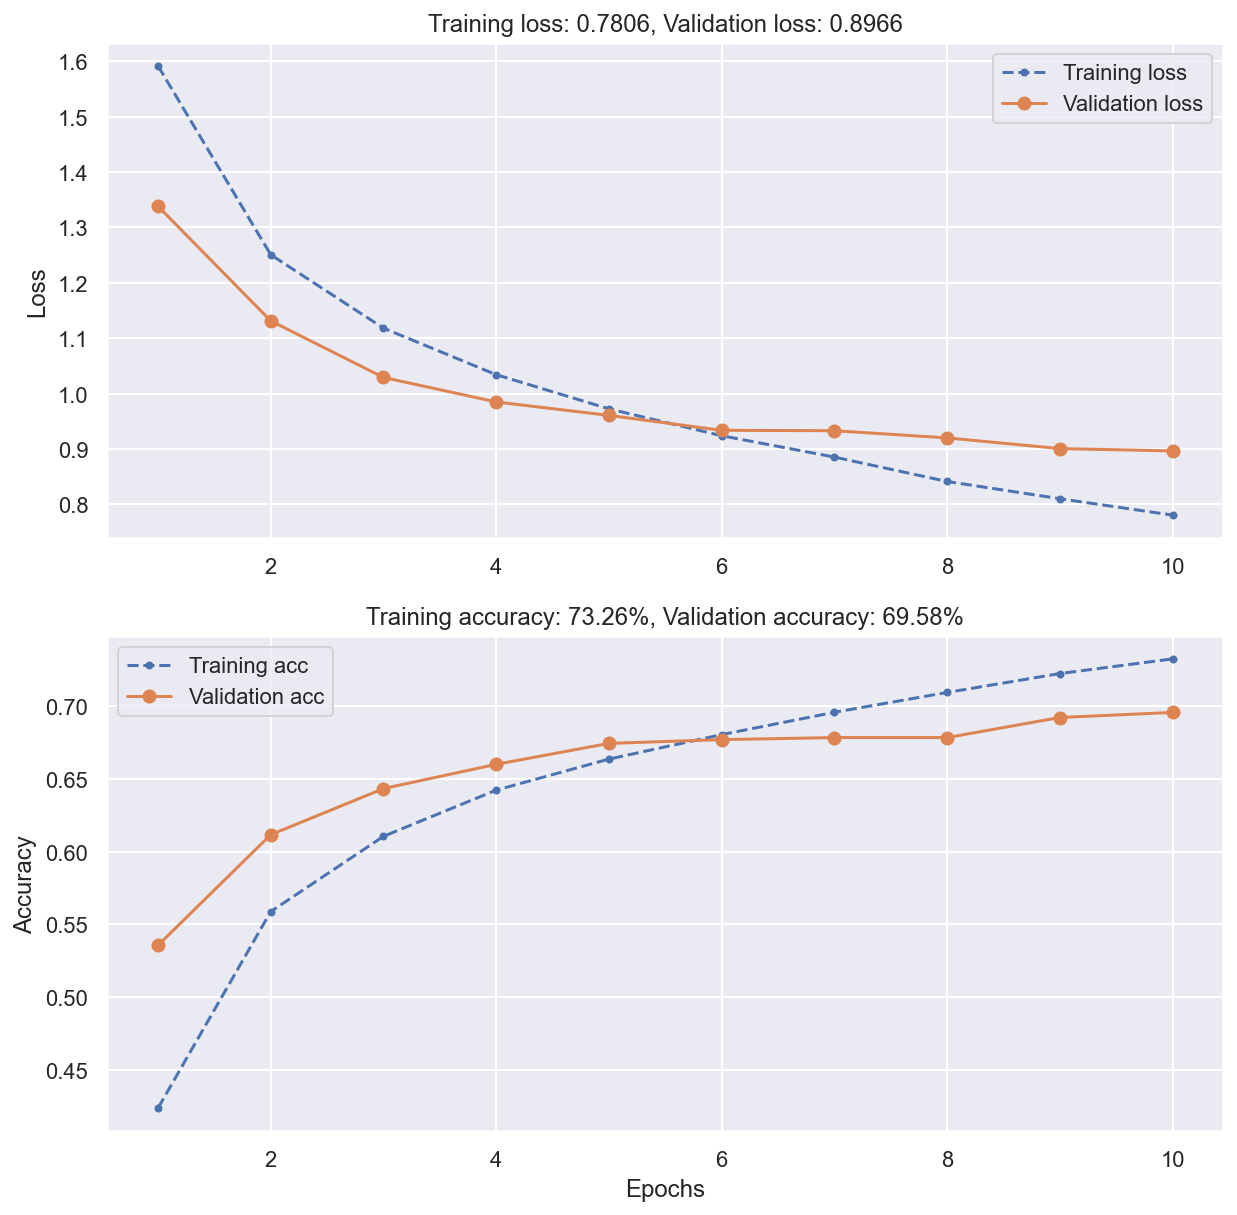

In [18]:
# Plot training history
plot_loss_acc(history)

In [19]:
# Retrieve final validation accuracy
val_acc = history.history['val_accuracy'][-1]

# Assert final validation accuracy
assert val_acc > 0.66

In [20]:
# Evaluate model performance on test data
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f'Test accuracy: {test_acc * 100:.2f}%')

Test accuracy: 69.65%
